## 2024년도 도전학기 '빅데이터와 인공지능을 활용한 시스템 강건설계' 데이터 챌린지

#### - 데이터 챌린지 목표: 빅데이터 핸들링 능력, 데이터 특징 추출 및 선택 능력 평가
#### - 제공 데이터 구성 : 스폿용접 전체 센서데이터 및 용접 시작 기록데이터
#### - 데이터 저장 시 index = None, header = None 필수!
#### - 총 4단계의 데이터 챌린지를 수행하며, 단계별 결과가 저장된 폴더(Result) 내의 결과물을 1개 압축파일(.zip)로 제출

.

.

.

## 라이브러리 import

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

## 센서데이터, 기록데이터 보기

### - 센서데이터 :
* 가속도 / 전압 / 전류 3열로 구성 (시간열 없음)
* 샘플링 주파수: 12800Hz
* 데이터 시작 시간: 0초 - (0행의 시간은 0초)
* 전체 용접 데이터에 300개의 용접 Spot 포함됨
* 각 용접 Spot 별 용접 소요 시간 약 0.2167초 (2774행)

### - 기록데이터 :
* 센서데이터의 Spot 별 용접 시작 시점이 초(second) 단위로 기록됨

### 데이터 살펴보기

In [2]:
# 센서데이터
SpotWeldingData = pd.read_csv('./SourceData/SpotweldingData.csv',   header = None, names = ['Acc', 'Voltage', 'Current'])

# 기록데이터
WeldingRecord   = pd.read_csv('./SourceData/WeldingRecord.csv',   header = None)

In [3]:
SpotWeldingData

,Acc,Voltage,Current
0,-0.059992,-0.019750,-0.005049
1,-0.050994,-0.018299,-0.005120
2,-0.050619,-0.016683,-0.005038
3,-0.050994,-0.024928,-0.005045
4,-0.054368,-0.019915,-0.005161
...,...,...,...
10999995,-0.031123,-0.027203,0.004886
10999996,-0.037871,-0.008293,0.004792
10999997,-0.047619,-0.005803,0.004912
10999998,-0.072740,0.000825,0.004897


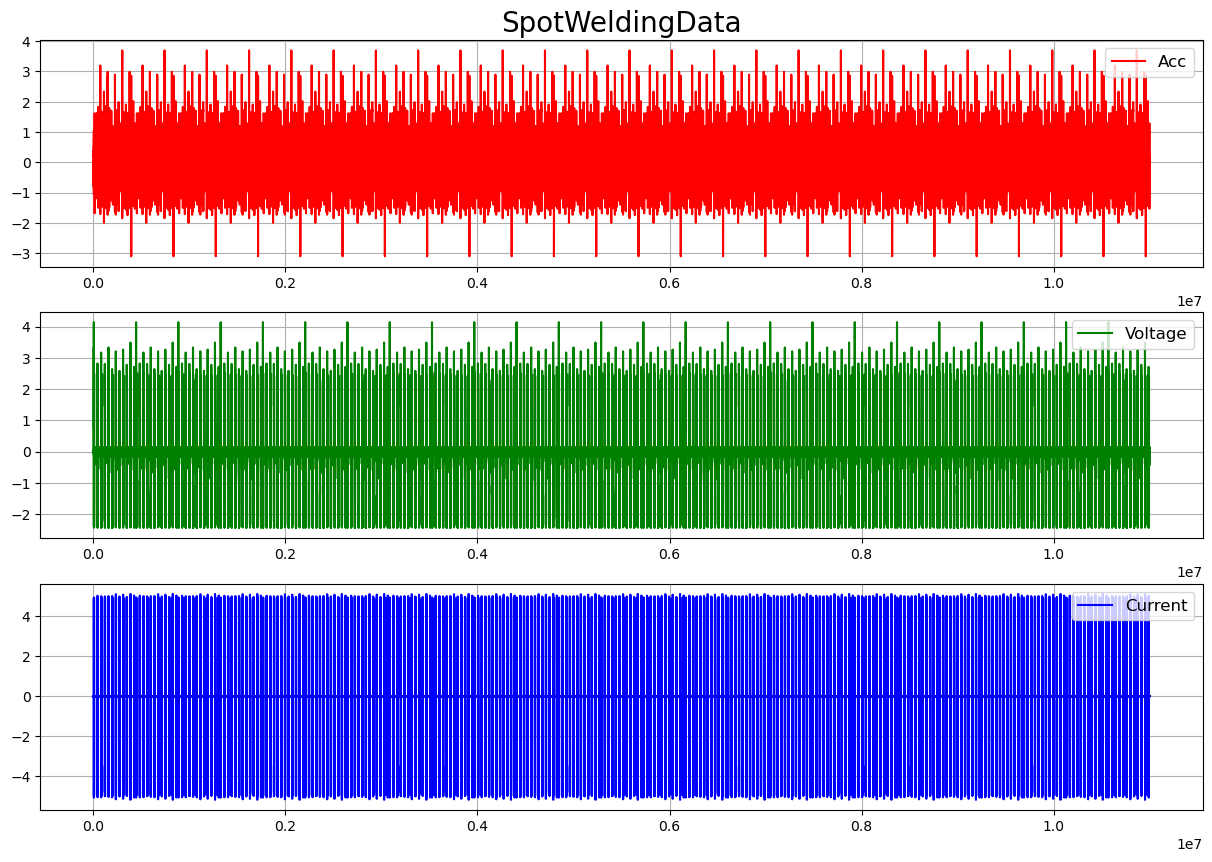

In [4]:
plt.figure(1, figsize=(15,10))

# 가속도데이터 Plot
plt.subplot(3,1,1)
plt.plot(SpotWeldingData.iloc[:,0], c = 'r', label = SpotWeldingData.columns[0])
plt.legend(loc = 'upper right', fontsize = 12)
plt.title('SpotWeldingData', fontsize = 20)
plt.grid()

# 전압데이터 Plot
plt.subplot(3,1,2)
plt.plot(SpotWeldingData.iloc[:,1], c = 'g', label = SpotWeldingData.columns[1])
plt.legend(loc = 'upper right', fontsize = 12)
plt.grid()

# 전류데이터 Plot
plt.subplot(3,1,3)
plt.plot(SpotWeldingData.iloc[:,2], c = 'b', label = SpotWeldingData.columns[2])
plt.legend(loc = 'upper right', fontsize = 12)
plt.grid()
plt.show()

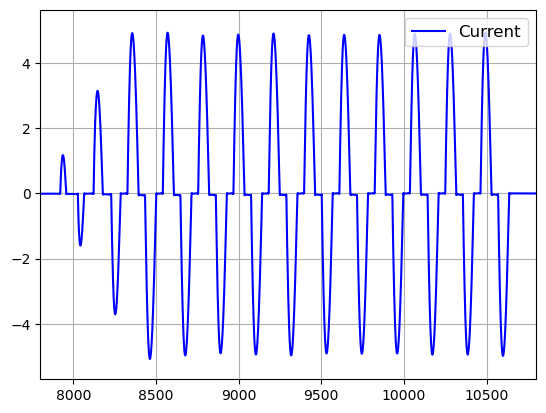

In [5]:
plt.plot(SpotWeldingData.iloc[:,2], c = 'b', label = SpotWeldingData.columns[2])
plt.legend(loc = 'upper right', fontsize = 12)
plt.grid()
plt.xlim(7800, 10800)
plt.show()

In [6]:
WeldingRecord

,0
0,0.617031
1,3.584453
2,6.568672
3,9.552969
4,12.520703
...,...
295,846.441406
296,849.409297
297,852.393672
298,855.378047


In [7]:
# 인덱싱 편리성을 위한 array 변환

WeldingRecord = np.array(WeldingRecord)
WeldingRecord

array([[6.17031250e-01],
       [3.58445313e+00],
       [6.56867187e+00],
       [9.55296875e+00],
       [1.25207031e+01],
       [1.54887500e+01],
       [1.84734375e+01],
       [2.14414062e+01],
       [2.44092969e+01],
       [2.73936719e+01],
       [3.03780469e+01],
       [3.33460156e+01],
       [3.49920312e+01],
       [3.79594531e+01],
       [4.09436719e+01],
       [4.39279687e+01],
       [4.68957031e+01],
       [4.98637500e+01],
       [5.28484375e+01],
       [5.58164062e+01],
       [5.87842969e+01],
       [6.17686719e+01],
       [6.47530469e+01],
       [6.77210156e+01],
       [6.93670312e+01],
       [7.23344531e+01],
       [7.53186719e+01],
       [7.83029688e+01],
       [8.12707031e+01],
       [8.42387500e+01],
       [8.72234375e+01],
       [9.01914062e+01],
       [9.31592969e+01],
       [9.61436719e+01],
       [9.91280469e+01],
       [1.02096016e+02],
       [1.03742031e+02],
       [1.06709453e+02],
       [1.09693672e+02],
       [1.12677969e+02],


.

.

.

# [1단계] 기록데이터 활용 센서데이터 Spot 별 분할(20점)
> #### 기록데이터 상 각각의 용접 시작 시점부터 <font color=red>용접 소요 시간</font>만큼(<font color=red>2774행≒0.2167초</font> 간) 해당 센서데이터 Spot별로 분할, 저장
> #### 저장 경로 : 이 코드 파일이 위치한 경로의 ' SplitData' 폴더 내부
> #### <font color=red>★ 주의: 분할된 센서 데이터는 분할 전과 동일하게 센서 종류 3열로 구성 / 데이터 size는 [2774, 3]</font>

## 필수!

#### SplitData 폴더 내부 각 데이터 파일명:
* SpotData_1.csv, SpotData_2.csv, SpotData_3.csv, ..., SpotData_300.csv

#### 데이터 분할을 위한 시간열 만들기

SpotweldingData에 대한 시간열 생성하기 (SpotWeldingData 길이만큼 SpotWeldingData_time 생성 필수!)

In [8]:
# 센서데이터 시간열 만들기 (변수명 수정 x)
Fs = 12800 # 샘플링 주파수

SpotWeldingData_time   = np.arange(0, len(SpotWeldingData)/Fs , 1/Fs)

#### Spot 데이터 분할

! 힌트 : np.where 사용시 array.round(5) 활용

In [9]:
# 시간열 이용하여 분할
Start_indexes = [] # 수정 금지

for i in range(WeldingRecord.shape[0]):
    # 용접 시작 시간 인덱싱
    Start_index = np.where( SpotWeldingData_time.round(5) == WeldingRecord[i].round(5))[0][0]
    Start_indexes.append(Start_index) # 수정 금지
    
    # Spot 데이터 분할
    temp = SpotWeldingData.iloc[ Start_indexes[i] : Start_indexes[i] + 2774 , :]
    
    # Spot 데이터 저장
    temp.to_csv(f'./SplitData/SpotData_{i+1}.csv', index = None, header = None )
    
Start_indexes = pd.DataFrame(Start_indexes) # 수정 금지

### 1단계 결과물을 제출용 파일로 저장(수강생 번호 외 코드 수정 X)

In [10]:
StudentNo = 199   # 수강생 번호 입력

SpotWeldingData_time   = pd.DataFrame(SpotWeldingData_time)
Start_indexes          = pd.DataFrame(Start_indexes)
SpotDataResult_1       = pd.read_csv('./SplitData/SpotData_70.csv' , header=None)
SpotDataResult_2       = pd.read_csv('./SplitData/SpotData_263.csv', header=None)

Path1 = './Result/ST%d_DC1_1.csv'%StudentNo
Path2 = './Result/ST%d_DC1_2.csv'%StudentNo
Path3 = './Result/ST%d_DC1_3.csv'%StudentNo
Path4 = './Result/ST%d_DC1_4.csv'%StudentNo

SpotWeldingData_time.to_csv(Path1, header=None, index=None)
Start_indexes       .to_csv(Path2, header=None, index=None)
SpotDataResult_1    .to_csv(Path3, header=None, index=None)
SpotDataResult_2    .to_csv(Path4, header=None, index=None)

.

.

.

# [2단계] 정상/고장 데이터 분할(10점)

> #### 1단계에서 분할한 <font color=red>정상 및 고장 데이터</font>로 분할
> #### SplitData의 SpotData_1.csv ~ SpotData_300.csv 활용 -> 정상 데이터는 홀수, 고장 데이터는 짝수 (아래 필수 셀 참고)
> #### 저장 경로 : 이 코드 파일이 위치한 경로의 'Data' 폴더 내부
> #### ★ 데이터 size는 [2774, 3], SpotData에서 이름만 변경하여 저장

## 필수!

#### Data 폴더 내부 각 데이터 파일명:
* <font color=blue>정상 데이터 : SpotData_1.csv, SpotData_3.csv, ... , SpotData_299.csv (홀수) -> Normal_1.csv ~ Normal_150.csv</font>
* <font color=red>고장 데이터 : SpotData_2.csv, SpotData_4.csv, ... , SpotData_300.csv (짝수) -> Abnormal_1.csv ~ Abnormal_150.csv</font>

#### <font color=red>ExerciseCode(0) Python Basic의 반복문, 조건문 및 비교 연산자</font> 참고

In [11]:
Normal_Number   = 0 # 현재 분할한 데이터 순서 반영용 변수, 필요없을 시 삭제 가능
Abnormal_Number = 0 # 현재 분할한 데이터 순서 반영용 변수, 필요없을 시 삭제 가능

for i in range(300):
    temp_SpotPath = './SplitData/SpotData_%d.csv'%(i+1)
    temp_SpotData = pd.read_csv(temp_SpotPath, header = None)
    
    if (i+1) % 2 == 0 : 
        temp_SpotData.to_csv(f'./Data/Abnormal_{Abnormal_Number+1}.csv', index = None, header = None )
        Abnormal_Number += 1
    else:
        temp_SpotData.to_csv(f'./Data/Normal_{Normal_Number+1}.csv', index = None, header = None )
        Normal_Number += 1

### 2단계 결과물을 제출용 파일로 저장(수강생 번호 외 코드 수정 X)

In [12]:
# StudentNo = 199   # 수강생 번호 입력

NormalData   = pd.read_csv('./Data/Normal_150.csv'  , header=None)
AbnormalData = pd.read_csv('./Data/Abnormal_150.csv', header=None)

Path1 = './Result/ST%d_DC2_1.csv'%StudentNo
Path2 = './Result/ST%d_DC2_2.csv'%StudentNo

NormalData  .to_csv(Path1, header=None, index=None)
AbnormalData.to_csv(Path2, header=None, index=None)

# [3단계] 데이터 특징 추출(10점)

> ### 2단계에서 분할한 정상/고장 데이터 모두 불러와서 <font color=red>시간 영역</font>에서만 특징 추출

## 필수!
* 2단계에서 추출한 데이터에 대하여 각 센서(열) 별로 아래 10개 특징값 순서대로 추출
* 특징값 종류 및 순서(실습코드와 동일): Max, Min, Mean, RMS, Variance, Skewness, Kurtosis, Crest factor, Shape factor, Impulse factor
* 추출된 특징데이터(DataFrame) 변수 이름: FeatureData
* 행 순서: Normal_1, Normal_2, ... , Normal_150, Abnormal_1, Abnormal_2, ... , Abnormal_150
* 열 순서: 실습 순서와 동일

In [13]:
import scipy.stats       as sp
import pywt

In [14]:
NoOfData    = 150 
NoOfSensor  = 3
NoOfFeature = 10

In [15]:
def rms(x): # RMS 함수 정의
    return np.sqrt(np.mean(x**2))

In [16]:
# 특징값 추출

# 특징데이터 크기 지정
TimeFeature_Normal   =  np.zeros((NoOfData, NoOfSensor*NoOfFeature))
TimeFeature_Abnormal =  np.zeros((NoOfData, NoOfSensor*NoOfFeature))

for i in range(NoOfData):
    # 데이터 불러오기
    temp_path1 = './Data/Normal_%d.csv'%(i+1)   # Normal 데이터 파일 경로
    temp_path2 = './Data/Abnormal_%d.csv'%(i+1) # Abnormal 데이터 파일 경로
    temp_data1 = pd.read_csv(temp_path1 , header=None, sep=',')         # 임시 Normal 데이터
    temp_data2 = pd.read_csv(temp_path2 , header=None, sep=',')         # 임시 Abnormal 데이터
    
    # Time Domain 특징값 추출
    for j in range(NoOfSensor):
        # Normal Time Domain Feature
        TimeFeature_Normal[i, 10*j+0] = np.max(temp_data1.iloc[:,j])
        TimeFeature_Normal[i, 10*j+1] = np.min(temp_data1.iloc[:,j])
        TimeFeature_Normal[i, 10*j+2] = np.mean(temp_data1.iloc[:,j])
        TimeFeature_Normal[i, 10*j+3] = rms(temp_data1.iloc[:,j])
        TimeFeature_Normal[i, 10*j+4] = np.var(temp_data1.iloc[:,j])
        TimeFeature_Normal[i, 10*j+5] = sp.skew(temp_data1.iloc[:,j])
        TimeFeature_Normal[i, 10*j+6] = sp.kurtosis(temp_data1.iloc[:,j])
        TimeFeature_Normal[i, 10*j+7] = np.max(temp_data1.iloc[:,j])/rms(temp_data1.iloc[:,j])
        TimeFeature_Normal[i, 10*j+8] = rms(temp_data1.iloc[:,j])/np.mean(np.abs(temp_data1.iloc[:,j]))
        TimeFeature_Normal[i, 10*j+9] = np.max(temp_data1.iloc[:,j])/np.mean(np.abs(temp_data1.iloc[:,j]))
        
        # Abnormal Time Domain Feature
        TimeFeature_Abnormal[i, 10*j+0] = np.max(temp_data2.iloc[:,j])
        TimeFeature_Abnormal[i, 10*j+1] = np.min(temp_data2.iloc[:,j])
        TimeFeature_Abnormal[i, 10*j+2] = np.mean(temp_data2.iloc[:,j])
        TimeFeature_Abnormal[i, 10*j+3] = rms(temp_data2.iloc[:,j])
        TimeFeature_Abnormal[i, 10*j+4] = np.var(temp_data2.iloc[:,j])
        TimeFeature_Abnormal[i, 10*j+5] = sp.skew(temp_data2.iloc[:,j])
        TimeFeature_Abnormal[i, 10*j+6] = sp.kurtosis(temp_data2.iloc[:,j])
        TimeFeature_Abnormal[i, 10*j+7] = np.max(temp_data2.iloc[:,j])/rms(temp_data2.iloc[:,j])
        TimeFeature_Abnormal[i, 10*j+8] = rms(temp_data2.iloc[:,j])/np.mean(np.abs(temp_data2.iloc[:,j]))
        TimeFeature_Abnormal[i, 10*j+9] = np.max(temp_data2.iloc[:,j])/np.mean(np.abs(temp_data2.iloc[:,j]))
        
print(TimeFeature_Normal.shape)
print(TimeFeature_Abnormal.shape)

(150, 30)
(150, 30)


In [17]:
# 시간영역 특징 합치기
TimeFeature = np.concatenate([TimeFeature_Normal, TimeFeature_Abnormal], axis=0) # 정상, 고장 순서로 합치기
FeatureData = pd.DataFrame(TimeFeature)

### 3단계 결과물 제출용 파일로 저장(수강생 번호 외 코드 수정 X)

In [18]:
# StudentNo = 199   # 수강생 번호 입력

Path1 = './Result/ST%d_DC3.csv'%StudentNo

FeatureData.to_csv(Path1, header=None, index=None)

.

.

.

# [4단계] t-Test 기반 주요 특징 선택(10점)

## 필수!
* 정상/고장의 각 특징 별 t-Test 수행, P-value 오름차순 기준 상위 10개 주요 특징 선택하여 저장
* 선택된 특징데이터(DataFrame) 변수 이름: FeatureSelected

#### 특징데이터 분리: 정상, 고장

In [19]:
NoOfData = int(FeatureData.shape[0]/2)
Normal_FeatureData   = FeatureData.iloc[:NoOfData, :]
Abnormal_FeatureData = FeatureData.iloc[NoOfData:, :]

print(Normal_FeatureData.shape)
print(Abnormal_FeatureData.shape)

(150, 30)
(150, 30)


#### t-Test 수행, P-value 기준 정렬 (정렬된 변수명: P_value_Rank)

In [20]:
NoOfFeature = FeatureData.shape[1] # 추출된 Feature 갯수

P_value = np.zeros((NoOfFeature , 2))

# 특징값 각각 T-검정 수행
for i in np.arange(NoOfFeature):
    
    T_test       = np.array(sp.ttest_ind(Normal_FeatureData.iloc[:, i] , Abnormal_FeatureData.iloc[:, i]))
    P_value[i,0] = i          # Feature Index
    P_value[i,1] = T_test[1]  # P값 (P-value)
    
P_value      = pd.DataFrame(P_value)
P_value_Rank = P_value.sort_values([1],ascending=True)  # P-value 기준 오름차순 정렬

#### P-value 기준 특징 선택

In [21]:
Rank = 10

Normal   = np.zeros((NoOfData, Rank))
Abnormal = np.zeros((NoOfData, Rank))

for i in range(Rank):
    
    index          = int(P_value_Rank.iloc[i,0])
    Normal  [:, i] = Normal_FeatureData.iloc  [:, index].values
    Abnormal[:, i] = Abnormal_FeatureData.iloc[:, index].values

# 정상, 고장 특징값 합치기    
FeatureSelected = pd.DataFrame(np.concatenate([Normal, Abnormal] , axis=0))

print("Selected Feature Data Size :", FeatureSelected.shape)
print("= 데이터 %d개(정상/고장 각 %d개씩)가 각각 %d개의 최종 선택된 특징값으로 구성됨"
      %(FeatureSelected.shape[0], FeatureSelected.shape[0]/2, FeatureSelected.shape[1]))



Selected Feature Data Size : (300, 10)
= 데이터 300개(정상/고장 각 150개씩)가 각각 10개의 최종 선택된 특징값으로 구성됨


### 4단계 결과물 제출용 파일로 저장(수강생 번호 외 코드 수정 X)

In [22]:
# StudentNo = 199   # 수강생 번호 입력

Path1 = './Result/ST%d_DC4_1.csv'%StudentNo
Path2 = './Result/ST%d_DC4_2.csv'%StudentNo

FeatureSelected.to_csv(Path1, header=None, index=None)
P_value_Rank.   to_csv(Path2, header=None, index=None)

.

.

.

# [최종] 해당 코드 파일을 Result 폴더에 넣기

### 1. 해당 코드 파일명의 마지막에 본인 수강생 번호로 변경(ex: 수강생 번호 13번일 경우, DataChallenge_ST-13)
### 2. 해당코드 파일(.ipynb)을 Result 폴더에 넣기

# ● 결과가 저장된 폴더(Result) 내의 모든 파일을 하나의 zip파일로 제출
> #### 압축파일 이름 ST(수강생번호)_DC (예시: 한 자리 수 'ST0_DC', 두 자리 수 'ST00_DC', 세 자리 수 'ST000_DC',)
> #### SplitData, Data 폴더는 압축 필요 없음!
> #### 영상의 가이드와 다른 방식으로 압축할 경우 감점 (필히 데이터 챌린지 가이드 영상 확인 !)